   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

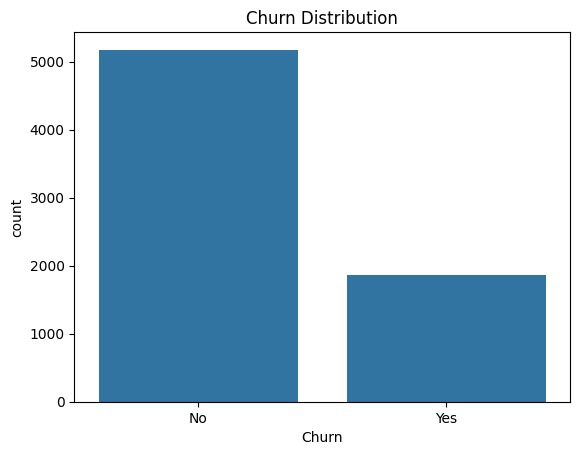

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv')
print(df.head())
print(df.info())

# initial Exploratory Data Analysis
print(df['Churn'].value_counts())
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.savefig('./visuals/churn_distribution.png')
plt.show()
plt.close()

In [47]:
# Step 4: Drop customerID column (not useful for prediction)
# df.drop('customerID', axis=1, inplace=True)

# Step 5: Convert TotalCharges to numeric (it may contain spaces)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Step 6: Handle missing values (TotalCharges)
print("Missing values before:\n", df.isnull().sum())
df.dropna(inplace=True)
print("Missing values after:\n", df.isnull().sum())

# Step 7: Encode categorical columns
# Identify categorical columns
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
# cat_cols.remove('Churn')  # We'll encode this separately

# One-hot encode categorical features
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Encode target variable: Churn (Yes=1, No=0)
# df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Step 8: Check dataset after encoding
print("Dataset shape after encoding:", df.shape)
print(df.head())


Missing values before:
 SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
customerID_0003-MKNFE                    0
                                        ..
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Churn_Yes                                0
Length: 7062, dtype: int64
Missing values after:
 SeniorCitizen                            0
tenure                                   0
MonthlyCharges                           0
TotalCharges                             0
customerID_0003-MKNFE                    0
                                        ..
PaperlessBilling_Yes                     0
PaymentMethod_Credit card (automatic)    0
PaymentMethod_Electronic check           0
PaymentMethod_Mailed check               0
Churn_Yes              

In [51]:
# Step 9: Split dataset into features and target
X = df.drop('Churn_Yes', axis=1)
y = df['Churn_Yes']

# Step 10: Train/test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

# Step 11: Train a Logistic Regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Step 12: Make predictions
y_pred = model.predict(X_test)

# Step 13: Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7953091684434968

Confusion Matrix:
 [[902 131]
 [157 217]]

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.87      0.86      1033
        True       0.62      0.58      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.80      0.79      1407



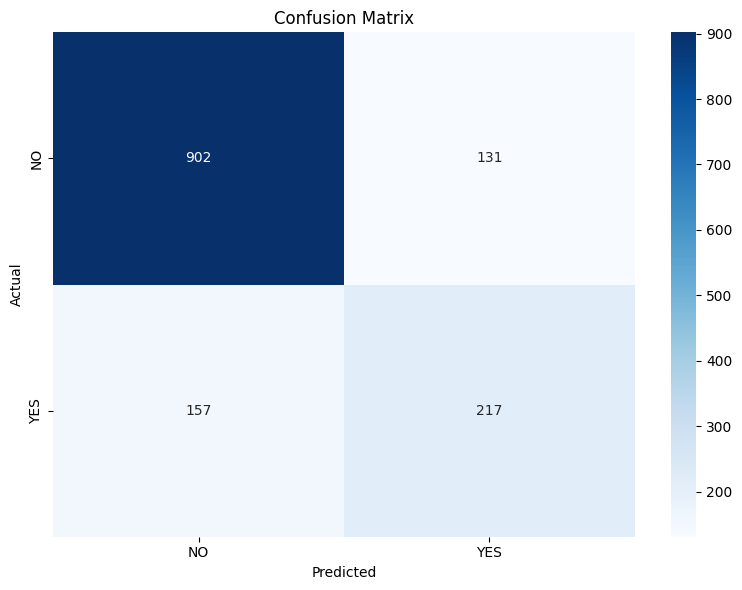

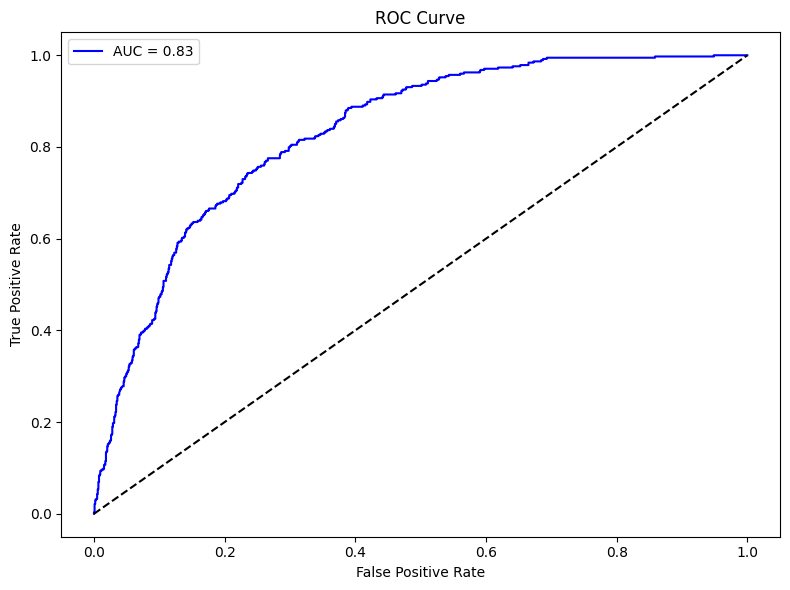

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

# confution matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['NO', 'YES'], yticklabels=['NO', 'YES'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('./visuals/confusion_matrix.png')
plt.show()
plt.close()


y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f"AUC = {roc_auc_score(y_test, y_pred_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.tight_layout()
plt.savefig('./visuals/roc_curve.png')
plt.show()
plt.close()



In [ ]:
import joblib

# Save the model
joblib.dump(model, './models/logistic_regression_model.pkl')
print("Model saved as logistic_regression_model.pkl")